## numpy, grad-by-hand
A third order polynomial, trained to predict `y=sin(x)` from `pi` to `pi` by minimizing squared Euclidean distance.

This implementation uses numpy to manually compute the forward pass, loss, and backward pass.

A numpy array is a generic n-dimensional array; it does not know anything about deep learning or
gradients or computational graphs, and is just a way to perform generic numeric computations.

In [1]:
import numpy as np
import math

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

In [3]:
learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

99 10.95189725619271
199 10.258236784783298
299 9.790935439351589
399 9.475833615070256
499 9.263156690665381
599 9.11946995314122
699 9.022295838237277
799 8.956510031496109
899 8.91192686476546
999 8.881680350661107
1099 8.86113785460331
1199 8.847170588736354
1299 8.83766332033754
1399 8.831184572014012
1499 8.826764582625833
1599 8.823745682377787
1699 8.821681370809628
1799 8.82026817916654
1899 8.819299621588737
1999 8.818635042775082
Result: y = 0.0009987713659447982 + 0.8560009800616664 x + -0.0001723046802527447 x^2 + -0.09322514996990884 x^3


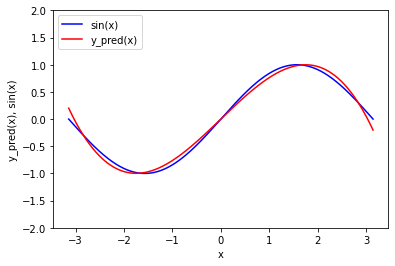

In [4]:
from matplotlib import pyplot as plt
import math

x = np.linspace(-math.pi, math.pi, 1000)

#y = [math.sin(z) for z in x]
#y_pred = [a + b*z + c*z**2 + d*z**3 for z in x]
import numpy as np
y = np.sin(x)
y_pred = a + b*x + c*x**2 + d*x**3

plt.ylim(-2,2)
plt.plot(x, y, "-b", label="sin(x)")
plt.plot(x, y_pred, "-r", label="y_pred(x)")
plt.xlabel("x")
plt.ylabel("y_pred(x), sin(x)")
plt.legend(loc="upper left")

## tensor on CUDA, grad-by-hand
A third order polynomial, trained to predict `y=sin(x)` from `-pi` to `pi` by minimizing squared
Euclidean distance.

This implementation uses PyTorch tensors to manually compute the forward pass, loss, and backward pass.

A PyTorch Tensor is basically the same as a numpy array: it does not know anything about deep
learning or computational graphs or gradients, and is just a generic n-dimensional array to be
used for arbitrary numeric computation.

The biggest difference between a numpy array and a PyTorch Tensor is that
a PyTorch Tensor can run on either CPU or GPU. To run operations on the GPU,
just cast the Tensor to a cuda datatype.

In [5]:
import torch
import math

In [6]:
dtype = torch.float
#device = torch.device("cpu")
device = torch.device("cuda:0") # Uncomment this to run on GPU

In [7]:
# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

In [8]:
# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

In [9]:
learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

99 1487.181884765625
199 1050.3507080078125
299 742.7969970703125
399 526.193603515625
499 373.6004638671875
599 266.0709228515625
699 190.2778778076172
799 136.8409423828125
899 99.1574935913086
999 72.577392578125
1099 53.82529067993164
1199 40.59325408935547
1299 31.254663467407227
1399 24.662757873535156
1499 20.00893783569336
1599 16.722898483276367
1699 14.402318000793457
1799 12.763334274291992
1899 11.60559368133545
1999 10.787698745727539


In [10]:
print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

Result: y = -0.0465245358645916 + 0.862780749797821 x + 0.008026257157325745 x^2 + -0.09418950974941254 x^3


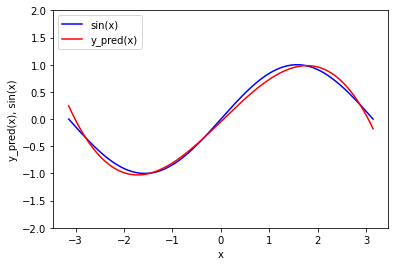

In [11]:
from matplotlib import pyplot as plt
import math

x = np.linspace(-math.pi, math.pi, 1000)

#y = [math.sin(z) for z in x]
#y_pred = [a + b*z + c*z**2 + d*z**3 for z in x]
import numpy as np
y = np.sin(x)
y_pred = a.item() + b.item()*x + c.item()*x**2 + d.item()*x**3

plt.ylim(-2,2)
plt.plot(x, y, "-b", label="sin(x)")
plt.plot(x, y_pred, "-r", label="y_pred(x)")
plt.xlabel("x")
plt.ylabel("y_pred(x), sin(x)")
plt.legend(loc="upper left")

## tensor on CUDA, autograd
A third order polynomial, trained to predict `y=sin(x)` from `-pi` to `pi` by minimizing squared 
Euclidean distance.

This implementation computes the forward pass using operations on PyTorch Tensors, and uses PyTorch
autograd to compute gradients.

A PyTorch Tensor represents a node in a computational graph. If ``x`` is a
Tensor that has ``x.requires_grad=True`` then ``x.grad`` is another Tensor
holding the gradient of ``x`` with respect to some scalar value.

In [15]:
import torch
import math

In [19]:
dtype = torch.float
#device = torch.device("cpu")
device = torch.device("cuda:0")  # Uncomment this to run on GPU

In [20]:
# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

In [21]:
# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

In [22]:
learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

99 580.6834716796875
199 406.8096923828125
299 286.03826904296875
399 202.0709991455078
499 143.64129638671875
599 102.94810485839844
699 74.5842514038086
799 54.79877471923828
899 40.986732482910156
999 31.33775520324707
1099 24.59235954284668
1199 19.87372589111328
1299 16.57073974609375
1399 14.257307052612305
1499 12.636014938354492
1599 11.499171257019043
1699 10.701604843139648
1799 10.141762733459473
1899 9.748610496520996
1999 9.472403526306152


In [23]:
print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

Result: y = 0.025918543338775635 + 0.8494888544082642 x + -0.004471380263566971 x^2 + -0.09229885786771774 x^3


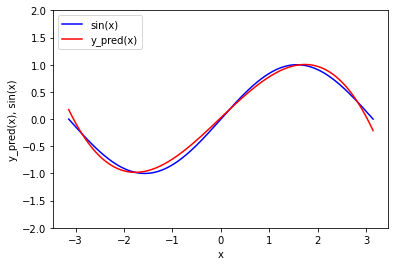

In [24]:
from matplotlib import pyplot as plt
import math
import numpy as np

x = np.linspace(-math.pi, math.pi, 1000)
#y = [math.sin(z) for z in x]
y = np.sin(x)
y_pred = a.item() + b.item()*x + c.item()*x**2 + d.item()*x**3

plt.ylim(-2,2)
plt.plot(x, y, "-b", label="sin(x)")
plt.plot(x, y_pred, "-r", label="y_pred(x)")
plt.xlabel("x")
plt.ylabel("y_pred(x), sin(x)")
plt.legend(loc="upper left")

## tensor on CUDA, custom autograd
PyTorch: Defining New autograd Functions

A third order polynomial, trained to predict `y=sin(x)` from `-pi` to `pi` by minimizing squared
Euclidean distance. Instead of writing the polynomial as `y=a+bx+cx^2+dx^3`, we write the polynomial
as `y=a+b*P3(c+dx)` where `P3(x)=1/2*(5x^3-3x)` is the `Legendre polynomial` of degree three.

This implementation computes the forward pass using operations on PyTorch Tensors, and uses PyTorch
autograd to compute gradients.

In this implementation we implement our own custom autograd function to perform `P3'(x)`.
By mathematics, `P3'(x)=3/2(5x^2-1)`

In [25]:
import torch
import math

In [26]:
class LegendrePolynomial3(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing torch.autograd.
    Function and implementing the forward and backward passes which operate on Tensors.
    """
    @staticmethod
    def forward(ctx, input):
        """
        In the forward pass we receive a Tensor containing the input and return a Tensor containing
        the output. ctx is a context object that can be used to stash information for backward
        computation. You can cache arbitrary objects for use in the backward pass using the
        ctx.save_for_backward method.
        """
        ctx.save_for_backward(input)
        return 0.5 * (5 * input ** 3 - 3 * input)

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss with respect
        to the output, and we need to compute the gradient of the loss with respect to the input.
        """
        input, = ctx.saved_tensors
        return grad_output * 1.5 * (5 * input ** 2 - 1)

In [27]:
dtype = torch.float
#device = torch.device("cpu")
device = torch.device("cuda:0")  # Uncomment this to run on GPU

In [28]:
# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

In [29]:
# Create random Tensors for weights. For this example, we need
# 4 weights: y = a + b * P3(c + d * x), these weights need to be initialized
# not too far from the correct result to ensure convergence.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), -1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 0.3, device=device, dtype=dtype, requires_grad=True)

In [31]:
learning_rate = 5e-6
for t in range(2000):
    # To apply our Function, we use Function.apply method. We alias this as 'P3'.
    P3 = LegendrePolynomial3.apply

    # Forward pass: compute predicted y using operations; we compute
    # P3 using our custom autograd operation.
    y_pred = a + b * P3(c + d * x)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass.
    loss.backward()

    # Update weights using gradient descent
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

99 8.903072357177734
199 8.87551498413086
299 8.856800079345703
399 8.844088554382324
499 8.835455894470215
599 8.82958698272705
699 8.825606346130371
799 8.822898864746094
899 8.821061134338379
999 8.81981086730957
1099 8.818962097167969
1199 8.818387985229492
1299 8.81799602508545
1399 8.817729949951172
1499 8.817550659179688
1599 8.817426681518555
1699 8.817344665527344
1799 8.81728744506836
1899 8.817249298095703
1999 8.817222595214844


In [32]:
print(f'Result: y = {a.item()} + {b.item()} * P3({c.item()} + {d.item()} x)')

Result: y = -4.515798013304817e-10 + -2.233529806137085 * P3(6.428350074472178e-10 + 0.2556561827659607 x)


In [33]:
print(a.item())

-4.515798013304817e-10


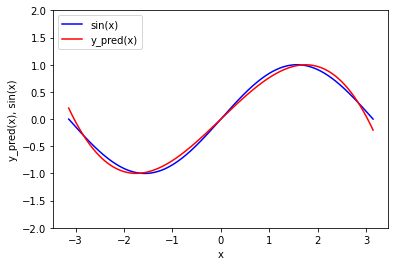

In [34]:
from matplotlib import pyplot as plt
import math

x = np.linspace(-math.pi, math.pi, 1000)

#y = [math.sin(z) for z in x]
#y_pred = [a + b*z + c*z**2 + d*z**3 for z in x]
import numpy as np
y = np.sin(x)
y_pred = a.item() + b.item() * 1/2*(5*(c.item()+d.item()*x)*(c.item()+d.item()*x)*(c.item()
                            +d.item()*x)-3*(c.item()+d.item()*x))

plt.ylim(-2,2)
plt.plot(x, y, "-b", label="sin(x)")
plt.plot(x, y_pred, "-r", label="y_pred(x)")
plt.xlabel("x")
plt.ylabel("y_pred(x), sin(x)")
plt.legend(loc="upper left")

## Gradients of an Intermediate Variable
This notebook illustrates how we can fetch the intermediate gradients of a function that is composed of multiple inputs and multiple computation steps in PyTorch. Note that gradient is simply a vector listing the derivatives of a function with respect
to each argument of the function. So, strictly speaking, we are discussing how to obtain the partial derivatives here.

Assume we have this simple toy graph. Now, we provide the following values to b, x, and w; the red numbers indicate the intermediate values of the computation and the end result:

![](images/graph_2.png)

Now, the next image shows the partial derivatives of the output node, a, with respect to the input nodes (b, x, and w) as well as all the intermediate partial derivatives:


![](images/graph_3.png)

For instance, if we are interested in obtaining the partial derivative of the output a with respect to each of the input and intermediate nodes, we could do the following in PyTorch, where `d_a_b` denotes "partial derivative of a with respect to b" and so forth:

## Intermediate Gradients in PyTorch via autograd's `grad`

In PyTorch, there are multiple ways to compute partial derivatives or gradients. If the goal is to just compute partial derivatives, the most straightforward way would be using `torch.autograd`'s `grad` function. By default, the `retain_graph` parameter of the `grad` function is set to `False`, which will free the graph after computing the partial derivative. Thus, if we want to obtain multiple partial derivatives, we need to set `retain_graph=True`. Note that this is a very inefficient solution though, as multiple passes over the graph are being made where intermediate results are being recalculated:

In [35]:
import torch
import torch.nn.functional as F
from torch.autograd import grad

x = torch.tensor([3.], requires_grad=True)
w = torch.tensor([2.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)

u = x * w
v = u + b
a = F.relu(v)

d_a_b = grad(a, b, retain_graph=True)
d_a_u = grad(a, u, retain_graph=True)
d_a_v = grad(a, v, retain_graph=True)
d_a_w = grad(a, w, retain_graph=True)
d_a_x = grad(a, x)
    
for name, grad in zip("xwbuv", (d_a_x, d_a_w, d_a_b, d_a_u, d_a_v)):
    print('d_a_%s:' % name, grad)

d_a_x: (tensor([2.]),)
d_a_w: (tensor([3.]),)
d_a_b: (tensor([1.]),)
d_a_u: (tensor([1.]),)
d_a_v: (tensor([1.]),)


this can be made rewritten in a more efficient manner by passing a tuple to the `grad` function so that it can reuse intermediate results and only require one pass over the graph:

In [36]:
import torch
import torch.nn.functional as F
from torch.autograd import grad

x = torch.tensor([3.], requires_grad=True)
w = torch.tensor([2.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)

u = x * w
v = u + b
a = F.relu(v)

partial_derivatives = grad(a, (x, w, b, u, v))

for name, grad in zip("xwbuv", (partial_derivatives)):
    print('d_a_%s:' % name, grad)

d_a_x: tensor([2.])
d_a_w: tensor([3.])
d_a_b: tensor([1.])
d_a_u: tensor([1.])
d_a_v: tensor([1.])


## Intermediate Gradients in PyTorch via `retain_grad`

In PyTorch, we most often use the `backward()` method on an output variable to compute its partial derivative (or gradient) with respect to its inputs (typically, the weights and bias units of a neural network). By default, PyTorch only stores the gradients of the leaf variables (e.g., the weights and biases) via their `grad` attribute to save memory. So, if we are interested in the intermediate results in a computational graph, we can use the `retain_grad` method to store gradients of non-leaf variables as follows:

In [37]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable

x = torch.tensor([3.], requires_grad=True)
w = torch.tensor([2.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)

u = x * w
v = u + b
a = F.relu(v)

u.retain_grad()
v.retain_grad()

a.backward()

for name, var in zip("xwbuv", (x, w, b, u, v)):
    print('d_a_%s:' % name, var.grad)

d_a_x: tensor([2.])
d_a_w: tensor([3.])
d_a_b: tensor([1.])
d_a_u: tensor([1.])
d_a_v: tensor([1.])


## Intermediate Gradients in PyTorch Using Hooks

Finally, and this is a not-recommended workaround, we can use hooks to obtain intermediate gradients. While the two other approaches explained above should be preferred, this approach highlights the use of hooks, which may come in handy in certain situations.

The hook will be called every time a gradient with respect to the variable is computed.  (http://pytorch.org/docs/master/autograd.html#torch.autograd.Variable.register_hook)

We can use these hooks in a combination with a little helper function, `save_grad` and a `hook` closure writing the partial derivatives or gradients to a global variable `grads`. So, if we invoke the `backward` method on the output node `a`, all the intermediate results will be collected in `grads`, as illustrated below:

In [38]:
import torch
import torch.nn.functional as F

grads = {}
def save_grad(name):
    def hook(grad):
        grads[name] = grad
    return hook

x = torch.tensor([3.], requires_grad=True)
w = torch.tensor([2.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)

u = x * w
v = u + b

x.register_hook(save_grad('d_a_x'))
w.register_hook(save_grad('d_a_w'))
b.register_hook(save_grad('d_a_b'))
u.register_hook(save_grad('d_a_u'))
v.register_hook(save_grad('d_a_v'))

a = F.relu(v)

a.backward()

grads

{'d_a_v': tensor([1.]),
 'd_a_b': tensor([1.]),
 'd_a_u': tensor([1.]),
 'd_a_x': tensor([2.]),
 'd_a_w': tensor([3.])}